# Tarea 5

José Francisco Pacheco Quintana A01373488

<h4>1.- Hasta  el  momento,  las  variables  independientes  de  los  modelos han  sido  valores  numéricos. Investiguen el método de one hot enconding para que los modelos tomen como entrada valores categóricos. Describan este proceso y adjunten la referencia de su investigación.</h4>

Según la documentación de scikit-learn, el proceso de one hot encoding consiste en crear una columna nueva por cada categoría existente en cada columna. Una vez hecho esto, se señala en cada columna con un uno si la categoría de esa columna está presente en las columnas a decodificar y con un cero si no, de manera que la información categórica queda codificada de forma binaria. En caso de que existan datos categóricos sin especificar (vacíos), estos pueden ser ignorados (se crea una columna con ceros) o se despliega un error.

En la librería de Scikit-learn existe la clase OneHotEncoder, la cual toma como parámetros de entrada categories (se especifican las categorías o estas son determinadas por la clase de forma automática), drop (se eliminan columnas en caso de que haya algún conflicto o por conveniencia), sparse (regresa una matriz dispersa si está en True o un array denso si está en False, dtype (qué tipo de datos se desean como salida, por default se encuentra en valores del tipo float), handle_unknown (determina si se despliega un error o si las categorías desconocidas se ignoran).

En la documentación, se utiliza como ejemplo un array X con valores: [['Male', 1], ['Female', 3], ['Female', 2]] para la codificación. Utilizando la clase con los parámetros por default y como entrada el array [['Female', 1], ['Male', 4]], se obtiene como resultado el array [[1., 0., 1., 0., 0.], [0., 1., 0., 0., 0.]]. Si se añadieran las categorías, quedaría de la siguiente manera: [[Female, Male, 1, 3, 2], [1., 0., 1., 0., 0.], [0., 1., 0., 0., 0.]]

2.-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Titanic.csv')
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


Basado en [1](#Link), se dividió la columan 'Fare' en diez intervalos. A continuación se aprecian los límites inferior y superior de cada intervalo

In [3]:
pd.cut(df['Fare'], bins = 10, retbins = True, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

(0      0
 1      1
 2      0
 3      1
 4      0
       ..
 886    0
 887    0
 888    0
 889    0
 890    0
 Name: Fare, Length: 891, dtype: category
 Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9],
 array([ -0.5123292,  51.23292  , 102.46584  , 153.69876  , 204.93168  ,
        256.1646   , 307.39752  , 358.63044  , 409.86336  , 461.09628  ,
        512.3292   ]))

In [4]:
Fare = pd.cut(df['Fare'], bins = 10, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
df['Fare'] = Fare
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,0,S
1,1,1,female,1,0,1,C
2,1,3,female,0,0,0,S
3,1,1,female,1,0,1,S
4,0,3,male,0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,0,S
887,1,1,female,0,0,0,S
888,0,3,female,1,2,0,S
889,1,1,male,0,0,0,C


In [5]:
df.isnull().values.any()

True

In [6]:
for col in df.columns:
    print(df[col].isnull().values.any())

False
False
False
False
False
False
True


In [7]:
df['Embarked'].count()

889

Son 891 filas en total, como son 889 registros que sí tienen datos, se decidió eliminar los registros vacíos

In [8]:
df = df.dropna()

In [9]:
Y = df['Survived'].to_numpy()
df = df.drop('Survived', axis = 1)
X = df.to_numpy()
X

array([[3, 'male', 1, 0, 0, 'S'],
       [1, 'female', 1, 0, 1, 'C'],
       [3, 'female', 0, 0, 0, 'S'],
       ...,
       [3, 'female', 1, 2, 0, 'S'],
       [1, 'male', 0, 0, 0, 'C'],
       [3, 'male', 0, 0, 0, 'Q']], dtype=object)

In [10]:
X.shape

(889, 6)

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [13]:
encoded = enc.transform(X).toarray()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(encoded,Y,test_size=0.20)

In [16]:
logistic_reg = LogisticRegression()

In [17]:
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
testing = logistic_reg.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test, testing)

array([[98, 16],
       [28, 36]], dtype=int64)

In [21]:
accuracy = (91+49)/(21+17+91+49)
accuracy

0.7865168539325843

In [22]:
query = enc.transform([[1, 'female', 0, 0, 0, 'C'], [0, 0, 0, 0, 0, 0]])

Según el modelo, la persona hubiera sobrevivido:

In [23]:
query_test = logistic_reg.predict(query)
query_test

array([1, 1], dtype=int64)

Antes de hacer el proceso ya mostrado, previamente había hecho la regresión sin dividir la columna 'Fare' en intervalos, lo cual arrojó un resultado de 100% de accuracy (lo cual demuestra overfitting) que no se muestra porque obviamente está incorrecta, en la codificación, había una columna para cada fare diferente, que supongo que fue lo que aumentó el accuracy del modelo. Creo que si se aumentaran los intervalos, quizá se lograría aumentar el accuracy, por lo que a continuación se muestra el mismo modelo, pero con 15 intervalos en 'Fare'.

In [24]:
df1 = pd.read_csv('Titanic.csv')
df1

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


In [25]:
pd.cut(df1['Fare'], bins = 15, retbins = True, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

(0      0
 1      2
 2      0
 3      1
 4      0
       ..
 886    0
 887    0
 888    0
 889    0
 890    0
 Name: Fare, Length: 891, dtype: category
 Categories (15, int64): [0 < 1 < 2 < 3 ... 11 < 12 < 13 < 14],
 array([ -0.5123292,  34.15528  ,  68.31056  , 102.46584  , 136.62112  ,
        170.7764   , 204.93168  , 239.08696  , 273.24224  , 307.39752  ,
        341.5528   , 375.70808  , 409.86336  , 444.01864  , 478.17392  ,
        512.3292   ]))

In [26]:
df1['Fare'] = pd.cut(df1['Fare'], bins = 15, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
df1

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,0,S
1,1,1,female,1,0,2,C
2,1,3,female,0,0,0,S
3,1,1,female,1,0,1,S
4,0,3,male,0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,0,S
887,1,1,female,0,0,0,S
888,0,3,female,1,2,0,S
889,1,1,male,0,0,0,C


In [27]:
df1 = df1.dropna()

In [28]:
Y1 = df1['Survived'].to_numpy()
df1 = df1.drop('Survived', axis = 1)
X1 = df1.to_numpy()
X1

array([[3, 'male', 1, 0, 0, 'S'],
       [1, 'female', 1, 0, 2, 'C'],
       [3, 'female', 0, 0, 0, 'S'],
       ...,
       [3, 'female', 1, 2, 0, 'S'],
       [1, 'male', 0, 0, 0, 'C'],
       [3, 'male', 0, 0, 0, 'Q']], dtype=object)

In [29]:
enc.fit(X1)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [30]:
encoded1 = enc.transform(X1).toarray()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(encoded1,Y1,test_size=0.33)

In [32]:
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
testing = logistic_reg.predict(X_test)

In [34]:
confusion_matrix(y_test, testing)

array([[147,  29],
       [ 40,  78]], dtype=int64)

El accuracy se mantuvo similar con 77.8% de accuracy con un mayor número de intervalos y también con un test batch del 33% del total de la información

In [35]:
accuracy = (162 + 67)/(162+34+31+67)
accuracy

0.7789115646258503

In [36]:
query1 = enc.transform([[1, 'female', 0, 0, 0, 'C'], [0, 0, 0, 0, 0, 0]])

De igual manera que el modelo anterior, este modelo predijo que con el query introducido, el output sería que la persona sobreviviría

In [37]:
query_test1 = logistic_reg.predict(query1)
query_test1

array([1, 1], dtype=int64)

3.-

In [38]:
q1_data = pd.read_csv('q1_data.csv', header = None, names = ['A', 'B', 'C'])
q1_data

,A,B,C
0,0.893841,0.448383,0.0
1,-0.763892,0.237633,1.0
2,-0.285130,-0.747463,1.0
3,-0.844328,-0.535827,0.0
4,0.462058,-0.653071,1.0
...,...,...,...
995,0.728085,0.331500,1.0
996,0.394182,0.696147,1.0
997,0.996134,-0.087851,0.0
998,0.754392,0.266256,1.0


In [39]:
q1_data.isnull().values.any()

False

In [40]:
q1_data = q1_data.to_numpy()
q1_data

array([[ 0.89384142,  0.44838322,  0.        ],
       [-0.76389164,  0.23763327,  1.        ],
       [-0.2851295 , -0.74746315,  1.        ],
       ...,
       [ 0.99613361, -0.0878512 ,  0.        ],
       [ 0.75439243,  0.26625564,  1.        ],
       [-0.51443953,  0.85752666,  0.        ]])

In [41]:
X1 = q1_data[0:,0]
X2 = q1_data[0:,1]
Y = q1_data[0:,2]

In [42]:
features = q1_data[0:, 0:2]

a) Las features forman dos óvalos.

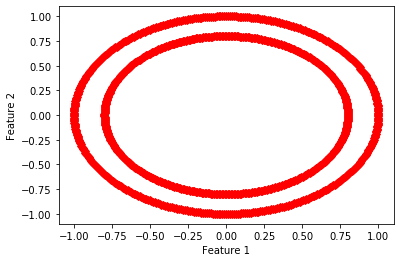

In [43]:
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.plot(X1, X2, 'rD')

In [44]:
from mpl_toolkits.mplot3d import Axes3D

Vistos de forma tridimensional, los features forman dos óvalos que se encuentran a diferentes alturas.

Text(0.5, 0, 'Y')

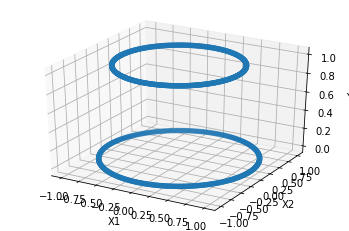

In [45]:
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y);
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

b)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(features,Y,test_size=0.20)

In [47]:
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
testing = logistic_reg.predict(X_test)

In [49]:
a = confusion_matrix(y_test, testing)
a

array([[31, 75],
       [35, 59]], dtype=int64)

Se obtuvo un accuracy de 46%

In [50]:
accuracy = (a[0][0] + a[1][1])/(a[0][0] + a[0][1] + a[1][0] + a[1][1])
accuracy

0.45

Se probó con otros tamaños de batches para ver si se podía lograr un accuracy mayor

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features,Y,test_size=0.33)
logistic_reg.fit(X_train, y_train)
testing = logistic_reg.predict(X_test)

In [52]:
b = confusion_matrix(y_test, testing)
b

array([[78, 87],
       [84, 81]], dtype=int64)

Con una división 66% - 33%, se obtuvo una ligera mejora en el accuracy del modelo

In [53]:
accuracy = (b[0][0] + b[1][1])/(b[0][0] + b[0][1] + b[1][0] + b[1][1])
accuracy

0.4818181818181818

Se probó el primer modelo con cross validation, con k = 10. El accuracy que se obtuvo en cada uno de los test es más cercano al modelo entrenado con 80% de los datos.

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logistic_reg, features, Y, cv=10)
scores

array([0.43, 0.45, 0.47, 0.43, 0.37, 0.46, 0.46, 0.43, 0.44, 0.45])

c) Yo creo que influye mucho la distribución de los datos, así que creo que una solución podría dividir los datos en cuadrantes de la siguiente manera: los datos negativos de cada columna de las features se pasan a nuevas columnas.

In [55]:
q1_data = pd.read_csv('q1_data.csv', header = None, names = ['A', 'B', 'C'])
q1_data

,A,B,C
0,0.893841,0.448383,0.0
1,-0.763892,0.237633,1.0
2,-0.285130,-0.747463,1.0
3,-0.844328,-0.535827,0.0
4,0.462058,-0.653071,1.0
...,...,...,...
995,0.728085,0.331500,1.0
996,0.394182,0.696147,1.0
997,0.996134,-0.087851,0.0
998,0.754392,0.266256,1.0


In [56]:
q1_data['E'] = q1_data['C']
q1_data.drop('C', axis = 1)
q1_data['C'] = q1_data['A'].where(q1_data['A'] < 0, other = 0)
q1_data['D'] = q1_data['B'].where(q1_data['B'] < 0, other = 0)
q1_data['A'] = q1_data['A'].where(q1_data['A'] > 0, other = 0)
q1_data['B'] = q1_data['B'].where(q1_data['B'] > 0, other = 0)
q1_data['C'] = q1_data['C']*-1
q1_data['D'] = q1_data['D']*-1
q1_data = q1_data[['A', 'B', 'C', 'D', 'E']]
q1_data

,A,B,C,D,E
0,0.893841,0.448383,-0.000000,-0.000000,0.0
1,0.000000,0.237633,0.763892,-0.000000,1.0
2,0.000000,0.000000,0.285130,0.747463,1.0
3,0.000000,0.000000,0.844328,0.535827,0.0
4,0.462058,0.000000,-0.000000,0.653071,1.0
...,...,...,...,...,...
995,0.728085,0.331500,-0.000000,-0.000000,1.0
996,0.394182,0.696147,-0.000000,-0.000000,1.0
997,0.996134,0.000000,-0.000000,0.087851,0.0
998,0.754392,0.266256,-0.000000,-0.000000,1.0


In [57]:
features = q1_data[['A', 'B', 'C', 'D']].to_numpy()
features

array([[ 0.89384142,  0.44838322, -0.        , -0.        ],
       [ 0.        ,  0.23763327,  0.76389164, -0.        ],
       [ 0.        ,  0.        ,  0.2851295 ,  0.74746315],
       ...,
       [ 0.99613361,  0.        , -0.        ,  0.0878512 ],
       [ 0.75439243,  0.26625564, -0.        , -0.        ],
       [ 0.        ,  0.85752666,  0.51443953, -0.        ]])

In [58]:
Y = q1_data['E'].to_numpy()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(features,Y,test_size=0.20)
logistic_reg.fit(X_train, y_train)
testing = logistic_reg.predict(X_test)

In [60]:
d = confusion_matrix(y_test, testing)
d

array([[ 73,  17],
       [  0, 110]], dtype=int64)

Con los cambios hechos, se obtuvo una mejora en el modelo, obteniendo 91% de accuracy

In [61]:
accuracy = (d[0][0] + d[1][1])/(d[0][0] + d[0][1] + d[1][0] + d[1][1])
accuracy

0.915

In [62]:
scores = cross_val_score(logistic_reg, features, Y, cv=10)
scores

array([0.94, 0.93, 0.87, 0.91, 0.87, 0.87, 0.87, 0.91, 0.89, 0.91])

<a id="Link"></a>
Referencias:
- Scikit-learn (2019). 'sklearn.preprocessing.OneHotEncoder'. Recuperado de: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- 1: Disha M. (n. d.). 'Frequency Distribution and Class Interval | Statistics'. Recuperado de: https://www.yourarticlelibrary.com/education/statistics/frequency-distribution-and-class-interval-statistics/91739
